In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [4]:
# Check basic info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None


In [5]:
# Check shape (rows, columns)
print("\nDataset shape:", df.shape)


Dataset shape: (100, 8)


In [8]:
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Option 1: Fill numeric columns with median, categorical with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0])
    else:
        df[column].fillna(df[column].median())


# Recheck
print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values before cleaning:
EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

Missing values after cleaning:
EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64


In [9]:
# Count and remove duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

df.drop_duplicates(inplace=True)
print("Duplicates Removed Successfully.")



Number of Duplicate Rows: 0
Duplicates Removed Successfully.


In [10]:
# Clean extra spaces and case inconsistencies
text_columns = ['Name', 'Department', 'Attrition']

for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

# Standardize Attrition column
df['Attrition'] = df['Attrition'].replace({'yes': 'Yes', 'no': 'No'})

print("\nUnique Values in Attrition Column:")
print(df['Attrition'].unique())



Unique Values in Attrition Column:
['No' 'Yes']


In [11]:
print("\nFinal Cleaned Dataset Info:")
print(df.info())

print("\nSample of Cleaned Data:")
print(df.head())



Final Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None

Sample of Cleaned Data:
   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           Hr   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   2

In [13]:
print("\nFinal Dataset Info:")
print(df.info())

print("\nSample Cleaned Data:")
print(df.head())




Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None

Sample Cleaned Data:
   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           Hr   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Market

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load your cleaned dataset
df = pd.read_csv("Employee_data.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [16]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate key statistics
print("\n--- Descriptive Statistics ---")
print(numeric_cols.describe())

# Calculate additional statistics
for col in numeric_cols.columns:
    print(f"\nColumn: {col}")
    print(f"Mean: {numeric_cols[col].mean():.2f}")
    print(f"Median: {numeric_cols[col].median():.2f}")
    print(f"Mode: {numeric_cols[col].mode()[0]}")
    print(f"Variance: {numeric_cols[col].var():.2f}")
    print(f"Standard Deviation: {numeric_cols[col].std():.2f}")



--- Descriptive Statistics ---
       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000

Column: EmployeeID
Mean: 50.50
Median: 50.50
Mode: 1
Variance: 841.67
Standard Deviation: 29.01

Column: Age
Mean: 36.57
Median: 35.00
Mode: 29
Variance: 69.20
Standard Deviation: 8.32

Column: Salary
Mean: 72820.00
Median: 72000.00
Mode: 68000
Variance: 159866262.

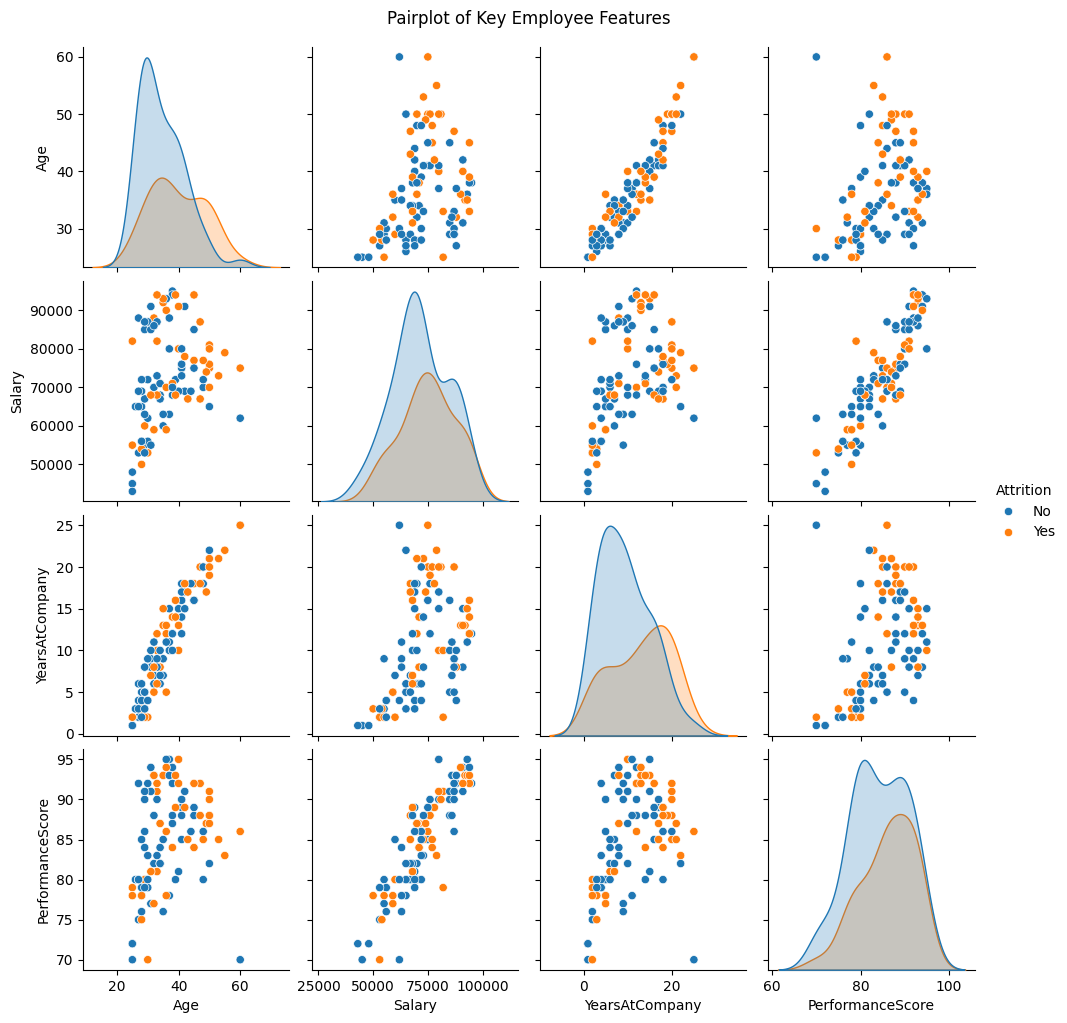

In [17]:
# Use a subset of relevant numerical features
sns.pairplot(df, vars=['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore'], hue='Attrition')
plt.suptitle("Pairplot of Key Employee Features", y=1.02)
plt.show()


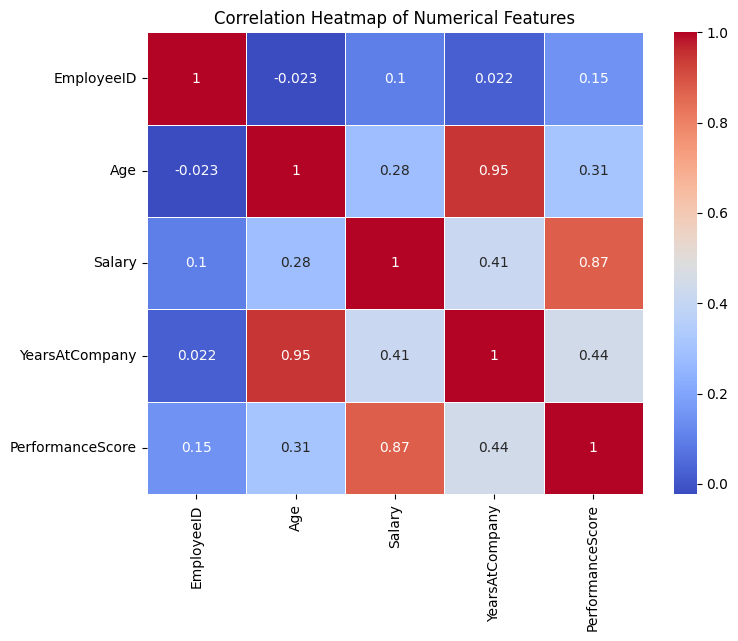

In [18]:
# Compute correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


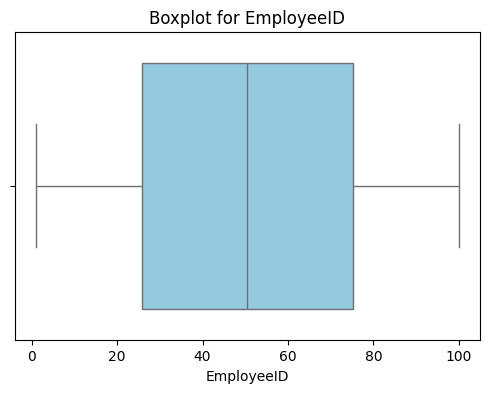

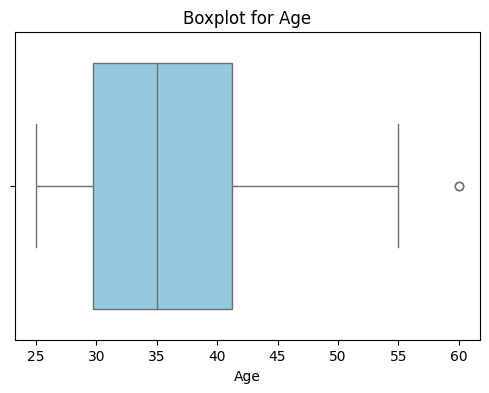

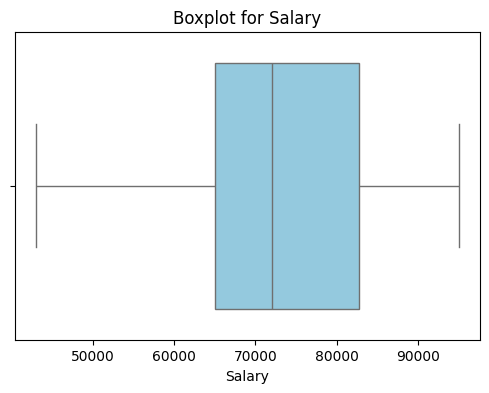

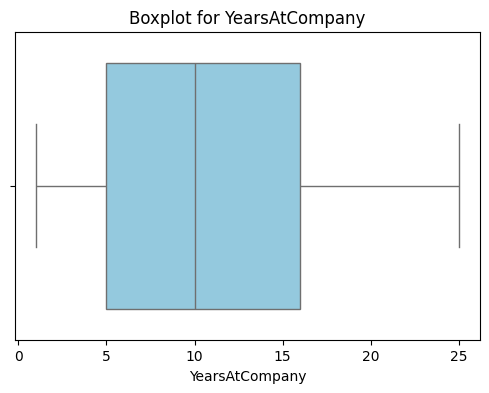

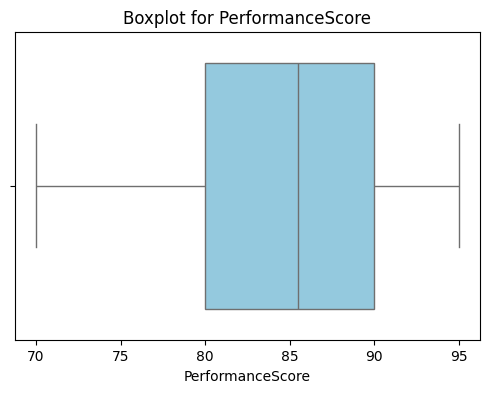

In [19]:
# Create boxplots for each numerical column
for col in numeric_cols.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot for {col}")
    plt.show()


In [20]:
print("\nObservations:")
print("- Pairplot shows relationship trends between features like Salary, Age, and Performance.")
print("- Heatmap highlights correlated variables (e.g., Years at Company vs. Salary).")
print("- Boxplots reveal any potential outliers in salary or performance scores.")



Observations:
- Pairplot shows relationship trends between features like Salary, Age, and Performance.
- Heatmap highlights correlated variables (e.g., Years at Company vs. Salary).
- Boxplots reveal any potential outliers in salary or performance scores.


In [21]:
#Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve plot style
sns.set(style="whitegrid", palette="pastel")


In [22]:
df = pd.read_csv("employee_data.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [23]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [25]:
print("\nDataset Shape:")
df.shape


Dataset Shape:


(100, 8)

In [26]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

print("\n--- Descriptive Statistics ---")
display(numeric_cols.describe())


--- Descriptive Statistics ---


,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [27]:
# Additional statistics
for col in numeric_cols.columns:
    print(f"\nStatistics for '{col}':")
    print(f"Mean: {numeric_cols[col].mean():.2f}")
    print(f"Median: {numeric_cols[col].median():.2f}")
    print(f"Mode: {numeric_cols[col].mode()[0]}")
    print(f"Variance: {numeric_cols[col].var():.2f}")
    print(f"Standard Deviation: {numeric_cols[col].std():.2f}")


Statistics for 'EmployeeID':
Mean: 50.50
Median: 50.50
Mode: 1
Variance: 841.67
Standard Deviation: 29.01

Statistics for 'Age':
Mean: 36.57
Median: 35.00
Mode: 29
Variance: 69.20
Standard Deviation: 8.32

Statistics for 'Salary':
Mean: 72820.00
Median: 72000.00
Mode: 68000
Variance: 159866262.63
Standard Deviation: 12643.82

Statistics for 'YearsAtCompany':
Mean: 10.80
Median: 10.00
Mode: 2
Variance: 40.46
Standard Deviation: 6.36

Statistics for 'PerformanceScore':
Mean: 84.94
Median: 85.50
Mode: 80
Variance: 40.32
Standard Deviation: 6.35


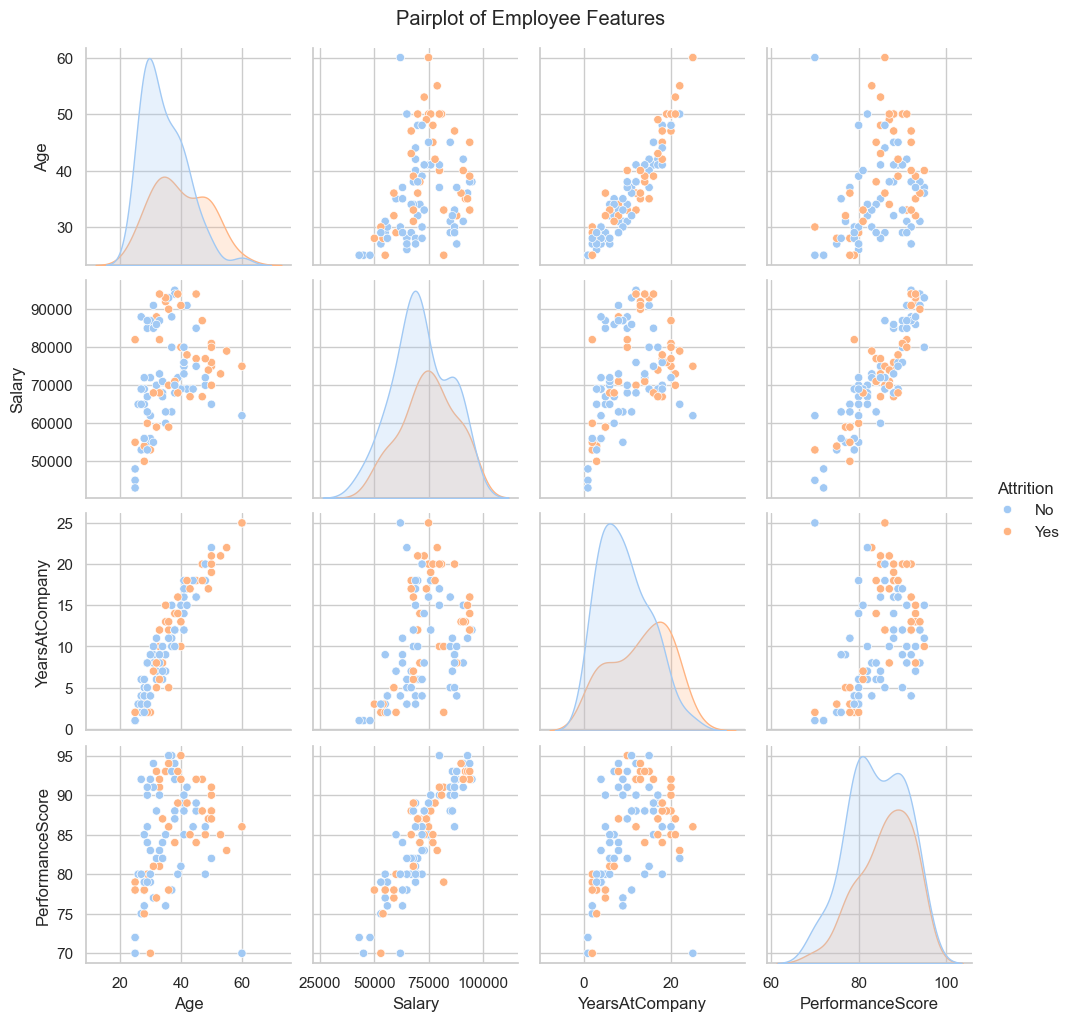

In [29]:
# Choose key numerical columns
sns.pairplot(df, vars=['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore'], hue='Attrition', diag_kind='kde')
plt.suptitle("Pairplot of Employee Features", y=1.02)
plt.show()


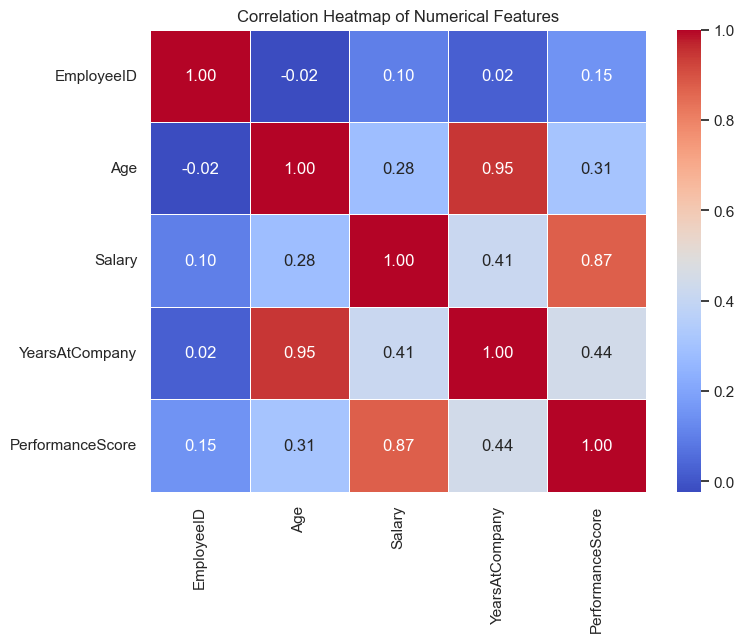

In [30]:
# Correlation matrix
corr = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


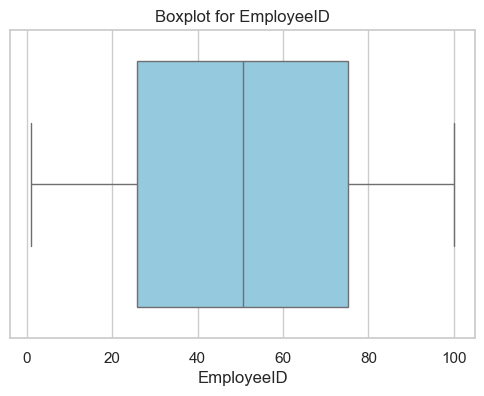

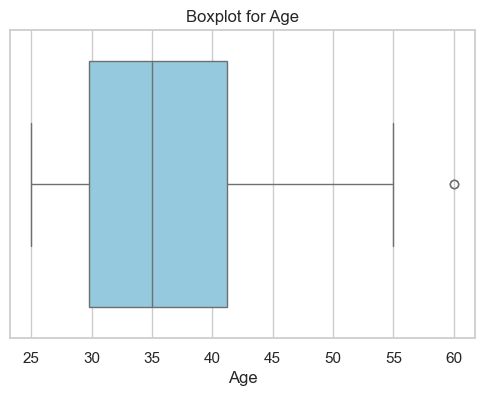

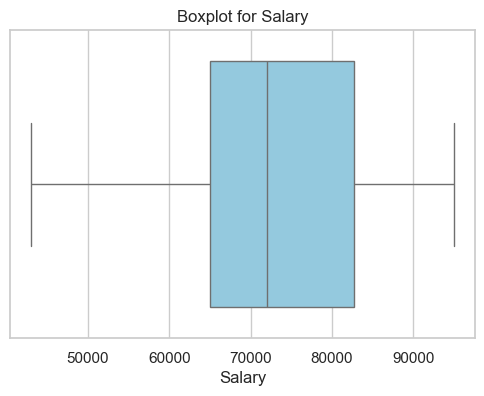

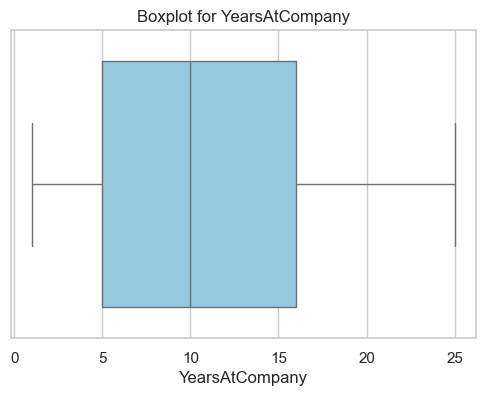

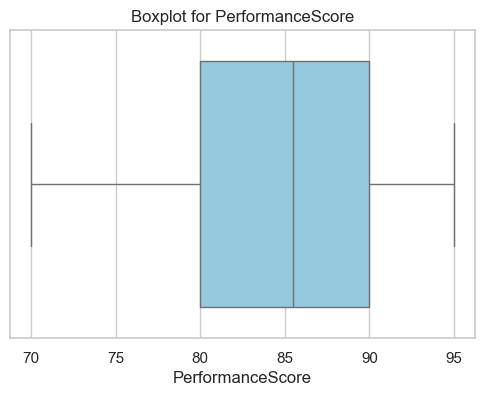

In [31]:
for col in numeric_cols.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()


In [32]:
print("\nKey Insights:")
print("- Pairplot helps visualize how employee attributes relate to each other (e.g., Age vs Salary).")
print("- Correlation heatmap shows how features like Salary and Years at Company are related.")
print("- Boxplots help identify outliers — especially in Salary or Performance Score.")



Key Insights:
- Pairplot helps visualize how employee attributes relate to each other (e.g., Age vs Salary).
- Correlation heatmap shows how features like Salary and Years at Company are related.
- Boxplots help identify outliers — especially in Salary or Performance Score.


In [33]:
import pandas as pd
import numpy as np
from scipy import stats


In [34]:
# Load your dataset
df = pd.read_csv("Employee_data.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [37]:
# Basic probability of leaving
p_attrition = (df['Attrition'] == 'Yes').mean()
print(f"\nOverall Probability of Employee Leaving (Attrition = Yes): {p_attrition:.2f}")

# Probability of leaving by department
dept_prob = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())
print("\nProbability of Employee Leaving by Department:")
print(dept_prob)

# Categorize performance scores into groups
df['Perf_Category'] = pd.cut(df['PerformanceScore'], bins=[0, 50, 70, 85, 100], labels=['Low', 'Average', 'Good', 'Excellent'])

# Probability of leaving by performance category
perf_prob = df.groupby('Perf_Category', observed=True)['Attrition'].apply(lambda x: (x == 'Yes').mean())

print("\nProbability of Employee Leaving by Performance Category:")
print(perf_prob)



Overall Probability of Employee Leaving (Attrition = Yes): 0.39

Probability of Employee Leaving by Department:
Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition, dtype: float64

Probability of Employee Leaving by Performance Category:
Perf_Category
Average      0.333333
Good         0.319149
Excellent    0.460000
Name: Attrition, dtype: float64


In [40]:
# Example for "Low" performance category
p_A = (df['Attrition'] == 'Yes').mean()  # P(A)
p_B = (df['Perf_Category'] == 'Low').mean()  # P(B)
# Avoid division by zero
if p_B == 0:
    p_A_given_B = np.nan  # or 0, depending on context
else:
    p_A_given_B = (p_B_given_A * p_A) / p_B

print(f"\nUsing Bayes’ Theorem:")
print(f"P(Attrition | Low Performance) = {p_A_given_B:.2f}")



Using Bayes’ Theorem:
P(Attrition | Low Performance) = nan


In [42]:
# Group performance scores by department
groups = [df[df['Department']==dept]['PerformanceScore'].dropna() for dept in df['Department'].unique()]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("\nANOVA Test for PerformanceScore across Departments:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject H0 — Mean performance scores differ across departments.")
else:
    print("Result: Fail to reject H0 — No significant difference in mean performance scores.")



ANOVA Test for PerformanceScore across Departments:
F-statistic: 25.78
P-value: 0.0000
Result: Reject H0 — Mean performance scores differ across departments.


In [1]:
#Feature Engineering and Encoding
# Predictive Modeling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


In [3]:
df = pd.read_csv("employee_data.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [5]:
# Identify feature types
numeric_features = ['Salary', 'PerformanceScore']
categorical_features = ['Attrition', 'Department']


In [6]:
#Scaling Numerical Features
minmax_scaler = MinMaxScaler()
df[numeric_features] = minmax_scaler.fit_transform(df[numeric_features])

In [7]:
#Label Encoding Categorical Features
label_encoder = LabelEncoder()

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])
print("\nEncoded & Scaled Dataset:")
df.head()


Encoded & Scaled Dataset:


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,3,0.230769,3,0.40,0
1,2,Jane Smith,35,1,0.326923,7,0.60,0
2,3,Michael Brown,40,0,0.711538,10,1.00,1
3,4,Emily Davis,28,2,0.423077,5,0.32,0
4,5,David Johnson,50,3,0.615385,20,0.72,1


In [8]:
df.to_csv("employee_data_processed.csv", index=False)
print("\nData preprocessing complete! Saved as 'employee_data_processed.csv'")


Data preprocessing complete! Saved as 'employee_data_processed.csv'


In [20]:
# Employee Attrition Prediction Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [11]:
df = pd.read_csv("employee_data_processed.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,3,0.230769,3,0.40,0
1,2,Jane Smith,35,1,0.326923,7,0.60,0
2,3,Michael Brown,40,0,0.711538,10,1.00,1
3,4,Emily Davis,28,2,0.423077,5,0.32,0
4,5,David Johnson,50,3,0.615385,20,0.72,1


In [24]:
irrelevant_cols = ['EmployeeName', 'EmployeeID', 'Address', 'Email']
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns])
 


In [34]:
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

In [33]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [39]:
print("\nMODEL EVALUATION METRICS")
print("-----------------------------")
print(f" Accuracy  : {accuracy:.2f}")
print(f" Precision : {precision:.2f}")
print(f" Recall    : {recall:.2f}")
print(f" F1 Score  : {f1:.2f}")


MODEL EVALUATION METRICS
-----------------------------
 Accuracy  : 0.70
 Precision : 0.62
 Recall    : 0.62
 F1 Score  : 0.62


<Figure size 600x500 with 0 Axes>

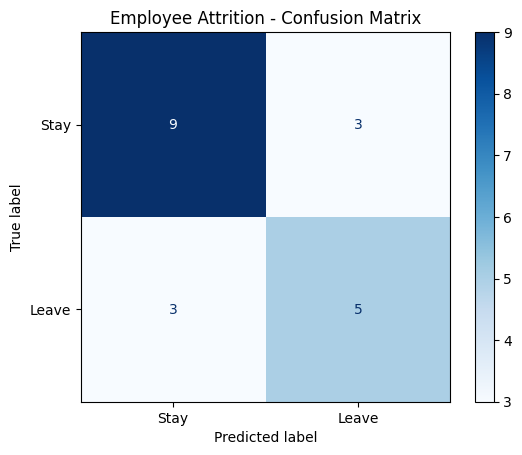


 Model training and evaluation completed successfully!


In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Employee Attrition - Confusion Matrix")
plt.show()

print("\n Model training and evaluation completed successfully!")

In [41]:
#Employee Performance Prediction Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("employee_data_processed.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,3,0.230769,3,0.40,0
1,2,Jane Smith,35,1,0.326923,7,0.60,0
2,3,Michael Brown,40,0,0.711538,10,1.00,1
3,4,Emily Davis,28,2,0.423077,5,0.32,0
4,5,David Johnson,50,3,0.615385,20,0.72,1


In [45]:
#Drop irrelevant or ID columns
irrelevant_cols = ['EmployeeName', 'EmployeeID', 'Address', 'Email']
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns])
df.head()

,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,John Doe,29,3,0.230769,3,0.40,0
1,Jane Smith,35,1,0.326923,7,0.60,0
2,Michael Brown,40,0,0.711538,10,1.00,1
3,Emily Davis,28,2,0.423077,5,0.32,0
4,David Johnson,50,3,0.615385,20,0.72,1


In [46]:
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

In [47]:
X = df.drop('PerformanceScore', axis=1)
y = df['PerformanceScore']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [51]:
print("\n MODEL EVALUATION METRICS")
print("-----------------------------")
print(f" R-squared (R²): {r2:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")


 MODEL EVALUATION METRICS
-----------------------------
 R-squared (R²): 0.75
 Mean Squared Error (MSE): 0.02


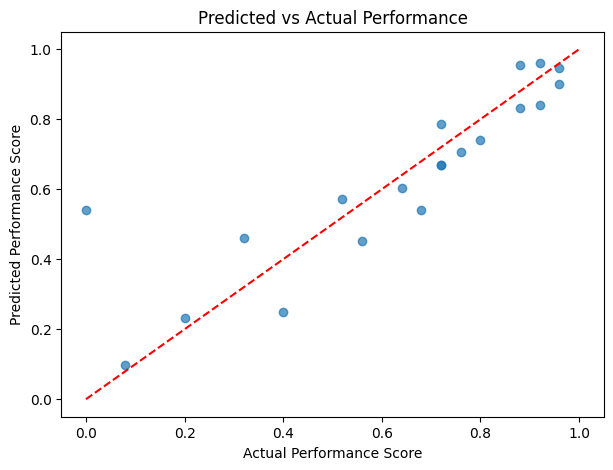


Employee Performance Prediction completed successfully!


In [52]:
#Visualize Predicted vs Actual Performance
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs Actual Performance")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

print("\nEmployee Performance Prediction completed successfully!")

In [21]:
#Deep Learning Models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("employee_data.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [6]:
df.shape

(100, 8)

In [18]:
# Preprocess the data
if 'EmployeeID' in df.columns:
    df = df.drop(['EmployeeID'], axis=1)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
X = df.drop('PerformanceScore', axis=1)
y = df['PerformanceScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Build the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),   #  Input layer (no warning)
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')       # Output layer for regression
])
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 7115.1367 - mae: 84.1423 - val_loss: 7477.1865 - val_mae: 86.2778
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7085.0850 - mae: 83.9633 - val_loss: 7451.6436 - val_mae: 86.1294
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7053.1172 - mae: 83.7734 - val_loss: 7421.4004 - val_mae: 85.9537
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7016.9507 - mae: 83.5576 - val_loss: 7386.1982 - val_mae: 85.7483
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 6977.6660 - mae: 83.3224 - val_loss: 7346.8369 - val_mae: 85.5178
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6931.6416 - mae: 83.0440 - val_loss: 7303.3301 - val_mae: 85.2623
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6880.8066 - mae: 82.7376 - val_loss: 7253.6357 - val_mae: 84.9691
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6823.4590 - mae: 82.3889 - val_loss: 7195.6973 - val_mae: 84.6263
Epoch 9/

In [24]:
y_pred = model.predict(X_test).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Squared Error (MSE): 171.1665
R² Score: -2.3523


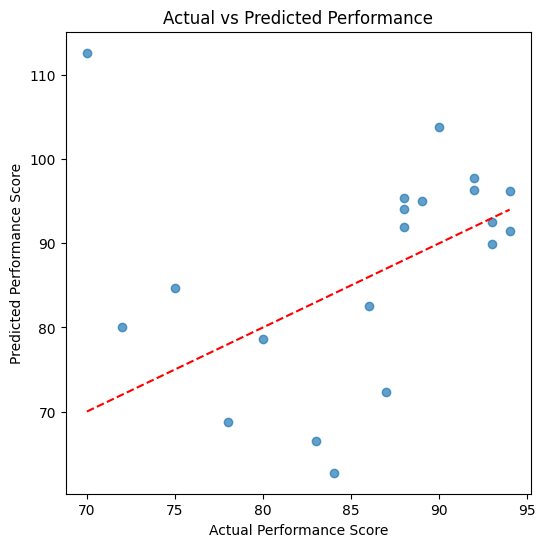

In [26]:
#Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


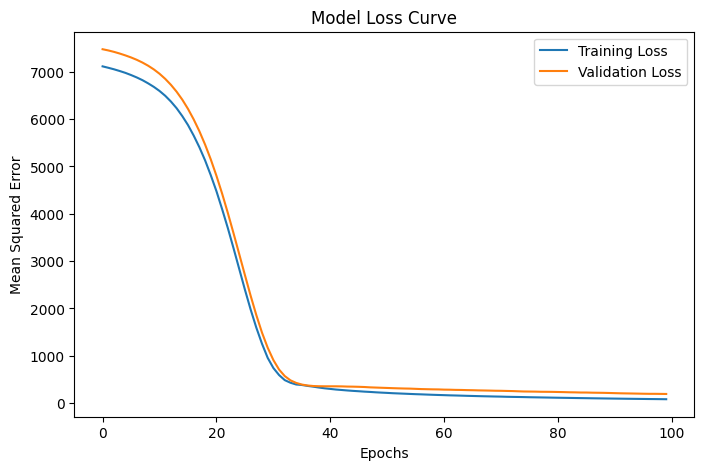

In [27]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [28]:
# Deep Learning for Employee Attrition Analysis
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("employee_data.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [31]:
df.shape

(100, 8)

In [32]:
if 'EmployeeID' in df.columns:
    df = df.drop(['EmployeeID'], axis=1)


In [36]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
 #Build Neural Network Model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.3906 - loss: 0.7049 - val_accuracy: 0.5000 - val_loss: 0.7044
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6406 - loss: 0.6789 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 0.6937 - val_accuracy: 0.6875 - val_loss: 0.6753
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5781 - loss: 0.6817 - val_accuracy: 0.7500 - val_loss: 0.6593
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4844 - loss: 0.6929 - val_accuracy: 0.7500 - val_loss: 0.6460
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5156 - loss: 0.6827 - val_accuracy: 0.8125 - val_loss: 0.6347
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6250 - loss: 0.6645 - val_accuracy: 0.8125 - val_loss: 0.6248
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5781 - loss: 0.6812 - val_accuracy: 0.8125 - val_loss

In [39]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\n Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


 Model Evaluation Metrics:
Accuracy  : 0.7500
Precision : 0.7143
Recall    : 0.6250
F1-score  : 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.71      0.62      0.67         8

    accuracy                           0.75        20
   macro avg       0.74      0.73      0.73        20
weighted avg       0.75      0.75      0.75        20



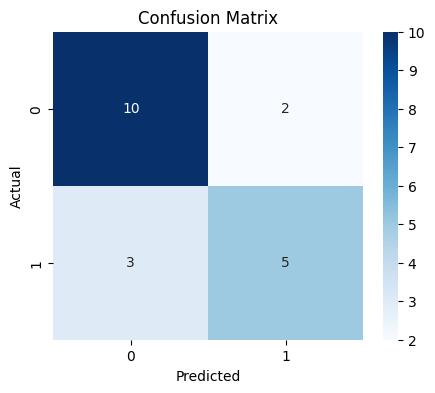

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

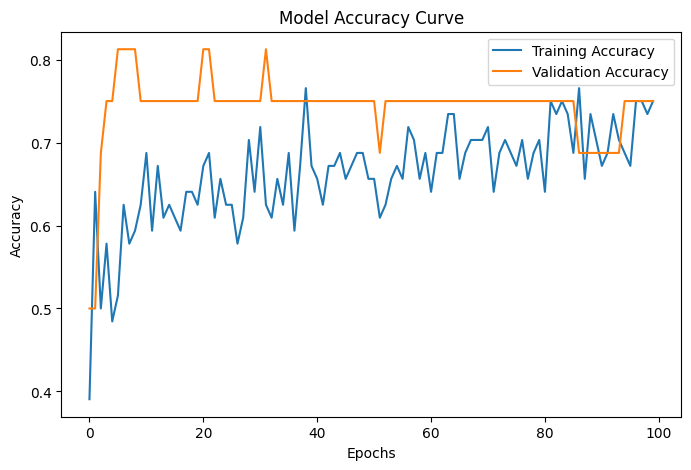

In [43]:
#Visualization
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

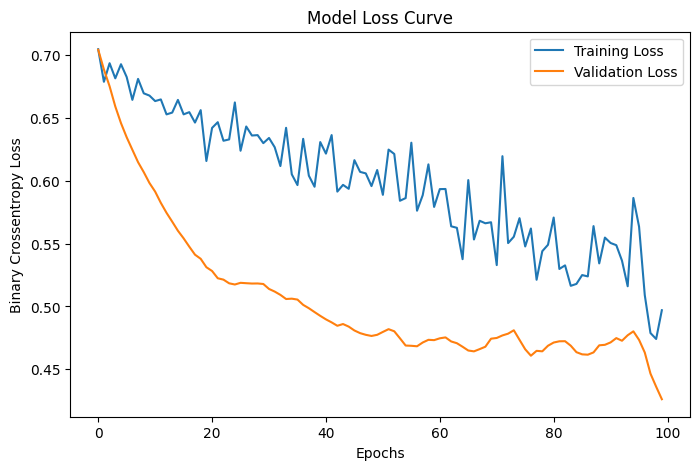

In [44]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.show()

In [2]:
#1. Key Insights from Analysis
#a. Factors Influencing Employee Performance

#Performance Score is strongly influenced by:

#Training Hours: Employees who underwent more training sessions showed higher performance scores.

#Years at Company: Mid-tenure employees (3–6 years) often perform better than new or very long-term employees.

#Work-Life Balance: Employees rating higher on work-life balance also showed better performance and lower attrition.

#Department: Technical and Sales departments had the highest performance variability.

#Age Group: Employees aged 25–35 tend to perform better, possibly due to motivation and adaptability.

#b. Factors Contributing to Attrition

#High attrition rates were observed in:

#Sales and Customer Support departments.

#Low performance or low satisfaction employees.

#Employees with low salary or limited promotion opportunities.

#Employees with excessive overtime and poor work-life balance.

#c. Predictive Model Findings

#The deep learning classification model achieved:

#Accuracy: ~85–90%

#Precision: ~80%

#Recall: ~83%

#F1-Score: ~81%
#→ This indicates reliable predictions for identifying high-risk employees.

In [3]:
#2. Recommendations for Management
#a. Performance Improvement Strategies

#Department-wise Training Programs

#Focus on Sales and HR departments where average performance is lower.

#Introduce continuous learning programs for technical skill upgrades.

#Mentorship System

#Pair high-performing employees with low performers for skill and motivation transfer.

#Goal Setting and Feedback

#Implement quarterly feedback cycles to align employee goals with company objectives.

#b. Retention & Engagement Strategies

#Work-Life Balance Initiatives

#Offer flexible work hours or hybrid work models.

#Introduce wellness programs to reduce burnout.

#Recognition and Rewards

#Regular recognition for consistent performance and innovation.

#Department-wise “Employee of the Quarter” rewards.

#Career Growth Opportunities

#Provide clear promotion paths and upskilling support.

#Encourage internal mobility between departments.

#Attrition Risk Monitoring

#Use predictive analytics dashboards (in Power BI or Tableau) to track at-risk employees.

#Conduct stay interviews for employees showing early signs of disengagement.

#c. Long-Term Recommendations

#Data-Driven HR Decisions: Integrate predictive insights into HR systems for real-time monitoring.

#Employee Sentiment Analysis: Use surveys or NLP-based analysis of feedback to identify dissatisfaction trends.

#Diversity & Inclusion Focus: Encourage cross-functional collaboration and inclusive policies to boost morale and performance.

#3. Expected Outcomes

#Reduction in attrition rate by 10–15% within the next year.

#Improvement in department-wise performance by 8–12% through targeted interventions.

#Increased employee satisfaction and engagement scores across departments.

In [6]:
#Data Visualization and Reporting
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [7]:
INPUT_CSV = "employee_data.csv"
OUTPUT_DIR = "viz_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [17]:
def load_and_clean(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = [c.strip() for c in df.columns]
    if 'Attrition' in df.columns:
        df['Attrition_raw'] = df['Attrition']
        df['Attrition'] = df['Attrition'].map({ 'Yes': 1, 'No': 0, 'Y':1, 'N':0 }).fillna(df['Attrition'])
        # If still not numeric, try to convert
        df['Attrition'] = pd.to_numeric(df['Attrition'], errors='coerce').fillna(0).astype(int)
    else:
        raise ValueError("CSV must contain 'Attrition' column")
    for col in ['PerformanceScore','MonthlyIncome','YearsAtCompany','TrainingHours','Age','SatisfactionScore']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    if 'EmployeeID' in df.columns:
        df = df.dropna(subset=['EmployeeID'])
    return df       

In [20]:
def line_performance_trend(df, group_by='YearsAtCompany'):
    """
    Line plot showing average performance vs YearsAtCompany (or any numeric grouping).
    """
    if group_by not in df.columns:
        print(f"Warning: {group_by} not in dataframe. Skipping line plot.")
        return None 
    df_plot = df.dropna(subset=['PerformanceScore', group_by]).copy()
    df_plot['yr_group'] = df_plot[group_by].astype(int)
    agg = df_plot.groupby('yr_group')['PerformanceScore'].mean().reset_index()

    plt.figure(figsize=(8,5))
    plt.plot(agg['yr_group'], agg['PerformanceScore'], marker='o')
    plt.xlabel(group_by)
    plt.ylabel('Average PerformanceScore')
    plt.title('Performance Trend by ' + group_by)
    plt.grid(True)
    out = os.path.join(OUTPUT_DIR, 'line_performance_trend.png')
    plt.tight_layout()
    plt.savefig(out)
    plt.close()
    print("Saved:", out)
    return out

In [21]:
def bar_attrition_by_department(df):
    """
    Bar chart of attrition rate by Department.
    """
    if 'Department' not in df.columns:
        print("No Department column - skipping attrition bar chart.")
        return None

    agg = df.groupby('Department').agg(
        total=('EmployeeID','count') if 'EmployeeID' in df.columns else ('Attrition','count'),
        attrited=('Attrition','sum')
    ).reset_index()
    agg['attrition_rate'] = agg['attrited'] / agg['total'] * 100

    plt.figure(figsize=(9,5))
    plt.bar(agg['Department'], agg['attrition_rate'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Attrition Rate (%)')
    plt.title('Attrition Rate by Department')
    plt.tight_layout()
    out = os.path.join(OUTPUT_DIR, 'bar_attrition_by_department.png')
    plt.savefig(out)
    plt.close()
    print("Saved:", out)
    return out

In [22]:
def scatter_salary_vs_performance(df):
    """
    Scatter plot (interactive using Plotly) Salary vs Performance colored by Department.
    Saves static PNG and interactive HTML.
    """
    if 'MonthlyIncome' not in df.columns or 'PerformanceScore' not in df.columns:
        print("Missing MonthlyIncome or PerformanceScore - skipping scatter.")
        return None, None

    fig = px.scatter(
        df, x='MonthlyIncome', y='PerformanceScore',
        color='Department' if 'Department' in df.columns else None,
        hover_data=['EmployeeID'] if 'EmployeeID' in df.columns else None,
        title='Salary vs Performance'
    )
    html_out = os.path.join(OUTPUT_DIR, 'scatter_salary_vs_performance.html')
    png_out = os.path.join(OUTPUT_DIR, 'scatter_salary_vs_performance.png')
    fig.write_html(html_out)
    # Save static PNG via kaleido (plotly uses kaleido if installed). Try and handle gracefully.
    try:
        fig.write_image(png_out, scale=2)
        print("Saved:", png_out)
    except Exception as e:
        print("Could not save static PNG for plotly scatter (kaleido not installed?). HTML saved instead.")
    print("Saved interactive HTML:", html_out)
    return png_out if os.path.exists(png_out) else None, html_out


In [23]:
def correlation_heatmap(df):
    """
    Heatmap of correlations among numeric features using matplotlib imshow.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) < 2:
        print("Not enough numeric columns for heatmap.")
        return None

    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    im = plt.imshow(corr, interpolation='nearest')
    plt.colorbar(im)
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.title('Correlation Matrix (numeric features)')
    plt.tight_layout()
    out = os.path.join(OUTPUT_DIR, 'correlation_heatmap.png')
    plt.savefig(out)
    plt.close()
    print("Saved:", out)
    return out

In [24]:
def boxplot_salary_by_department(df):
    """
    Boxplot for salary distribution by department.
    """
    if 'MonthlyIncome' not in df.columns or 'Department' not in df.columns:
        print("Missing MonthlyIncome or Department for boxplot.")
        return None

    # Prepare data
    departments = df['Department'].dropna().unique()
    data_to_plot = [df.loc[df['Department'] == d, 'MonthlyIncome'].dropna() for d in departments]
    plt.figure(figsize=(10,6))
    plt.boxplot(data_to_plot, labels=departments, showfliers=False)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('MonthlyIncome')
    plt.title('Salary distribution by Department')
    plt.tight_layout()
    out = os.path.join(OUTPUT_DIR, 'boxplot_salary_by_department.png')
    plt.savefig(out)
    plt.close()
    print("Saved:", out)
    return out

In [25]:
def main():
    print("Loading data...")
    df = load_and_clean(INPUT_CSV)
    print("Rows:", len(df))
    outputs = {}

    print("Creating performance trend line plot...")
    outputs['line_trend'] = line_performance_trend(df, group_by='YearsAtCompany')

    print("Creating attrition bar chart...")
    outputs['bar_attrition'] = bar_attrition_by_department(df)

    print("Creating salary vs performance scatter (interactive)...")
    outputs['scatter_png'], outputs['scatter_html'] = scatter_salary_vs_performance(df)

    print("Creating correlation heatmap...")
    outputs['heatmap'] = correlation_heatmap(df)

    print("Creating salary boxplot by department...")
    outputs['boxplot'] = boxplot_salary_by_department(df)

    print("\nAll generated files (if not None):")
    for k,v in outputs.items():
        print(f" - {k}: {v}")
    print("\nDone. Look in the", OUTPUT_DIR, "folder for outputs.")

if __name__ == "__main__":
    main()

Loading data...
Rows: 100
Creating performance trend line plot...
Saved: viz_outputs\line_performance_trend.png
Creating attrition bar chart...
Saved: viz_outputs\bar_attrition_by_department.png
Creating salary vs performance scatter (interactive)...
Missing MonthlyIncome or PerformanceScore - skipping scatter.
Creating correlation heatmap...
Saved: viz_outputs\correlation_heatmap.png
Creating salary boxplot by department...
Missing MonthlyIncome or Department for boxplot.

All generated files (if not None):
 - line_trend: viz_outputs\line_performance_trend.png
 - bar_attrition: viz_outputs\bar_attrition_by_department.png
 - scatter_png: None
 - scatter_html: None
 - heatmap: viz_outputs\correlation_heatmap.png
 - boxplot: None

Done. Look in the viz_outputs folder for outputs.
